<a href="https://colab.research.google.com/github/hectorvh/Learning/blob/main/Modulo3_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
julihocc_customers_path = kagglehub.dataset_download('julihocc/customers')

print('Data source import complete.')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

from sklearn.ensemble import RandomForestClassifier
#X, y = make_classification(n_samples=1000, n_features=4,
#                           n_informative=2, n_redundant=0,
#                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

In [ ]:
train_data = pd.read_csv("/kaggle/input/customers/synthetic_customer_data.csv")

train_data

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,Male,200.50,5,12,1,1
1,2,34,Female,120.75,2,30,0,0
2,3,28,Male,315.00,6,5,1,1
3,4,45,Female,150.00,3,15,1,0
4,5,42,Male,175.50,4,25,0,0
...,...,...,...,...,...,...,...,...
95,96,33,Female,240.00,5,7,1,1
96,97,31,Male,305.00,7,9,1,1
97,98,40,Female,215.25,4,14,0,0
98,99,36,Male,185.50,3,20,1,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               100 non-null    int64  
 1   age                       100 non-null    int64  
 2   gender                    100 non-null    object 
 3   total_spent               100 non-null    float64
 4   frequency                 100 non-null    int64  
 5   days_since_last_purchase  100 non-null    int64  
 6   marketing_engaged         100 non-null    int64  
 7   returned_next_month       100 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ KB


In [ ]:
train_data.describe()

,customer_id,age,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,34.300000,213.250000,4.500000,14.700000,0.600000,0.500000
std,29.011492,6.163595,59.069596,1.507557,7.681146,0.492366,0.502519
min,1.000000,25.000000,120.750000,2.000000,5.000000,0.000000,0.000000
25%,25.750000,29.000000,175.500000,3.000000,9.000000,0.000000,0.000000
50%,50.500000,33.500000,207.875000,4.500000,13.000000,1.000000,0.500000
75%,75.250000,40.000000,240.000000,6.000000,20.000000,1.000000,1.000000
max,100.000000,45.000000,315.000000,7.000000,30.000000,1.000000,1.000000


Text(0, 0.5, 'Frecuencia')

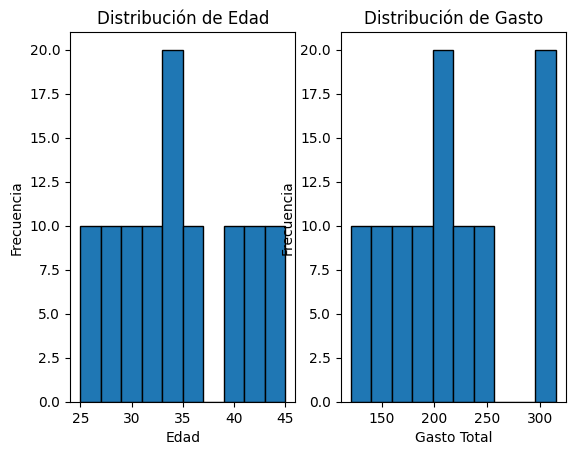

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(train_data['age'], edgecolor='black')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
plt.hist(train_data['total_spent'], edgecolor='black')
plt.title('Distribución de Gasto')
plt.xlabel('Gasto Total')
plt.ylabel('Frecuencia')

<Axes: xlabel='gender', ylabel='count'>

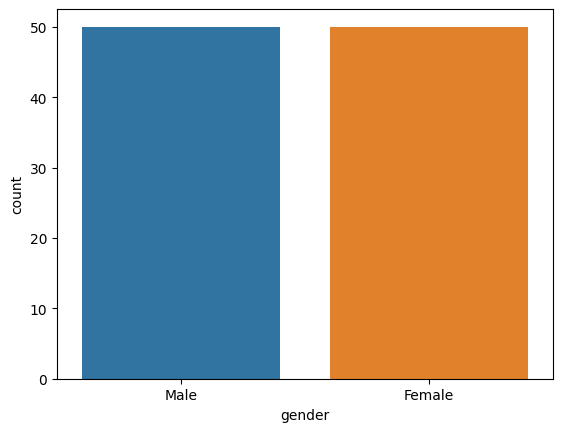

In [ ]:
sns.countplot(data=train_data, x='gender')

In [ ]:
train_data.isnull()

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False


In [ ]:
train_data.isnull().sum()
train_data.isnull().mean()*100

customer_id                 0.0
age                         0.0
gender                      0.0
total_spent                 0.0
frequency                   0.0
days_since_last_purchase    0.0
marketing_engaged           0.0
returned_next_month         0.0
dtype: float64

In [ ]:
train_data['gender'] = train_data['gender'].map({'Female': 0, 'Male': 1}).astype(np.int8)
train_data

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,1,200.50,5,12,1,1
1,2,34,0,120.75,2,30,0,0
2,3,28,1,315.00,6,5,1,1
3,4,45,0,150.00,3,15,1,0
4,5,42,1,175.50,4,25,0,0
...,...,...,...,...,...,...,...,...
95,96,33,0,240.00,5,7,1,1
96,97,31,1,305.00,7,9,1,1
97,98,40,0,215.25,4,14,0,0
98,99,36,1,185.50,3,20,1,0


In [ ]:
scaler = StandardScaler()
scaler.fit(train_data[['age', 'total_spent', 'frequency', 'days_since_last_purchase']])

StandardScaler()

In [ ]:
train_data[['age', 'total_spent', 'frequency', 'days_since_last_purchase']] = scaler.transform(train_data[['age', 'total_spent', 'frequency', 'days_since_last_purchase']])

In [ ]:
train_data[['age', 'total_spent', 'frequency', 'days_since_last_purchase']].describe()

,age,total_spent,frequency,days_since_last_purchase
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,4.329870e-16,-1.776357e-17,-4.440892e-18,5.440093e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.516461e+00,-1.573838e+00,-1.666667e+00,-1.269194e+00
25%,-8.642198e-01,-6.422962e-01,-1.000000e+00,-7.458152e-01
50%,-1.304483e-01,-9.145277e-02,0.000000e+00,-2.224361e-01
75%,9.294439e-01,4.551370e-01,1.000000e+00,6.934773e-01
max,1.744746e+00,1.731222e+00,1.666667e+00,2.001925e+00


In [ ]:
# variables predictoras
X = train_data.drop(['returned_next_month', 'customer_id'], axis=1)

# variable objetivo
y = train_data['returned_next_month']

In [ ]:
# Dividir los datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
model3 = RandomForestClassifier(max_depth=2, random_state=0)
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred1 = model1.predict(X_val)
print(y_pred1)
y_pred2 = model2.predict(X_val)
print(y_pred2)
y_pred3 = model3.predict(X_val)
print(y_pred3)

[0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0]
[0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0]
[0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0]


In [ ]:
# Evaluar el rendimiento métricas de rendimiento: exactitud, precisión, recall, F1 y AUC-ROC.
#print(mean_absolute_error(y_val, y_pred1))
#print(mean_squared_error(y_val, y_pred1))
print(r2_score(y_val, y_pred1))
accuracy1=accuracy_score(y_val, y_pred1)
print(f"Accuracy: {accuracy1:.4f}")
print(precision_score(y_val, y_pred1))
print(recall_score(y_val, y_pred1, average='binary', zero_division=1))
print(f1_score(y_val, y_pred1, zero_division=1.0))
print(roc_auc_score(y, model1.predict_proba(X)[:, 1]))

1.0
Accuracy: 1.0000
1.0
1.0
1.0
1.0


In [ ]:
print(r2_score(y_val, y_pred2))
print(accuracy_score(y_val, y_pred2))
print(precision_score(y_val, y_pred2))
print(recall_score(y_val, y_pred2, average='binary', zero_division=1))
print(f1_score(y_val, y_pred2, zero_division=1.0))
print(roc_auc_score(y, model2.predict_proba(X)[:, 1]))

1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
print(r2_score(y_val, y_pred3))
print(accuracy_score(y_val, y_pred3))
print(precision_score(y_val, y_pred3))
print(recall_score(y_val, y_pred3, average='binary', zero_division=1))
print(f1_score(y_val, y_pred3, zero_division=1.0))
print(roc_auc_score(y, model3.predict_proba(X)[:, 1]))

1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(RandomForestClassifier(max_depth=2, random_state=0), param_grid, cv=5, scoring='accuracy')
# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

ValueError: Invalid parameter 'C' for estimator RandomForestClassifier(max_depth=2, random_state=0). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
# Ver los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'C': 0.01}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy con los mejores hiperparámetros: {accuracy:.4f}")

Accuracy con los mejores hiperparámetros: 1.0000
